<a href="https://colab.research.google.com/github/Daniel-Neagu/Number-Classifier-V1/blob/main/HandwrittenNumberClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.optim as optim
import numpy as np

torch.manual_seed(1)



loading the data

In [ ]:
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.4MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 483kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.49MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.41MB/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



creating the model

2 layers
input of 28*28

first layer 28*28 -> 30

second layer 30 -> 1


In [ ]:
class NN(nn.Module):
  def __init__(self):
    super(NN,self).__init__()
    self.layer1 = nn.Linear(28*28,30)
    self.layer2 = nn.Linear(30,1)

  def forward(self, img):
    flattened = img.view(-1, 28*28)
    activation1 = self.layer1(flattened)
    activation1 = F.relu(activation1)
    activation2 = self.layer2(activation1)
    return activation2


compressing data so it's now between 0 and 1.


training code

using criterion = nn.BCEWithLogitsLoss() as our loss fucntion means that the sigmoid is automatically passed to the last layer


learning rate = 0.01
momentum = 0.9

In [ ]:

def trainNN(model, epochs, learning_rate, momentum):
  criterion = nn.BCEWithLogitsLoss() #loss function
  optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum) #optimizer settings

  train_errors = []
  train_accuracies = []

  val_errors = []
  val_accuracies = []

  print(f"Training with: Learning Rate = {learning_rate}, Momentum = {momentum}")

  for epoch in range(epochs):
    train_error = 0
    val_error =0

    for (train_batch, val_batch) in zip(mnist_train, mnist_val):
      (train_image, train_label) = train_batch
      (val_image, val_label) = val_batch

      #ground truth for each image, is the digit less than 3 ? 0 or 1
      train_actual_img = torch.tensor(train_label<3).reshape([1,1,]).type(torch.FloatTensor)
      train_out = model(img_to_tensor(train_image)) #gets output from the model
      prob = torch.sigmoid(train_out) #converts the output to a probability
      if(prob <0.5 and train_label <3) or (prob>=0.5 and train_label >=3):
        train_error+=1

      val_actual_img = torch.tensor(val_label<3).reshape([1,1,]).type(torch.FloatTensor)
      val_out = model(img_to_tensor(val_image))
      prob = torch.sigmoid(val_out)
      if(prob <0.5 and val_label <3) or (prob>=0.5 and val_label >=3):
        val_error+=1


      loss = criterion(train_out, train_actual_img) #calculates the loss
      loss.backward() #obtains the gradients based on the loss function
      optimizer.step() #updates the model parameters
      optimizer.zero_grad() #clean up step!

    train_errors.append(train_error/len(mnist_train))
    print("Training Error Rate: ", train_errors[epoch])
    train_accuracies.append(1-train_error/len(mnist_train))
    print("Training Accuracy: ", train_accuracies[epoch])

    val_errors.append(val_error/len(mnist_val))
    print("Validation Error Rate: ", val_errors[epoch])
    val_accuracies.append(1-val_error/len(mnist_val))
    print("Validation Accuracy: ", val_accuracies[epoch])

  plt.plot(np.arange(1,epochs+1,1) , train_accuracies)
  plt.title("Training Accuracy vs Epochs")
  plt.xlabel("Epochs")
  plt.ylabel("Training Accuracy")
  plt.show()

  plt.plot(np.arange(1,epochs+1,1) , train_errors)
  plt.title("Training Errors vs Epochs")
  plt.xlabel("Epochs")
  plt.ylabel("Training Errors")
  plt.show()

  plt.plot(np.arange(1,epochs+1,1) , val_accuracies)
  plt.title("Validation Accuracy vs Epochs")
  plt.xlabel("Epochs")
  plt.ylabel("Validation Accuracy")
  plt.show()

  plt.plot(np.arange(1,epochs+1,1) , val_errors)
  plt.title("Validation Errors vs Epochs")
  plt.xlabel("Epochs")
  plt.ylabel("Validation Errors")
  plt.show()

Training with: Learning Rate = 0.01, Momentum = 0.9
Training Error Rate:  0.128
Training Accuracy:  0.872
Validation Error Rate:  0.146
Validation Accuracy:  0.854
Training Error Rate:  0.056
Training Accuracy:  0.944
Validation Error Rate:  0.106
Validation Accuracy:  0.894
Training Error Rate:  0.037
Training Accuracy:  0.963
Validation Error Rate:  0.079
Validation Accuracy:  0.921
Training Error Rate:  0.033
Training Accuracy:  0.967
Validation Error Rate:  0.083
Validation Accuracy:  0.917
Training Error Rate:  0.018
Training Accuracy:  0.982
Validation Error Rate:  0.077
Validation Accuracy:  0.923
Training Error Rate:  0.025
Training Accuracy:  0.975
Validation Error Rate:  0.084
Validation Accuracy:  0.916
Training Error Rate:  0.019
Training Accuracy:  0.981
Validation Error Rate:  0.076
Validation Accuracy:  0.924
Training Error Rate:  0.018
Training Accuracy:  0.982
Validation Error Rate:  0.074
Validation Accuracy:  0.926
Training Error Rate:  0.013
Training Accuracy:  0.98

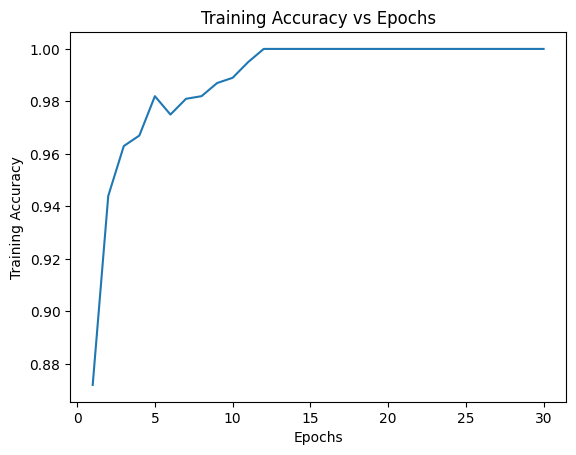

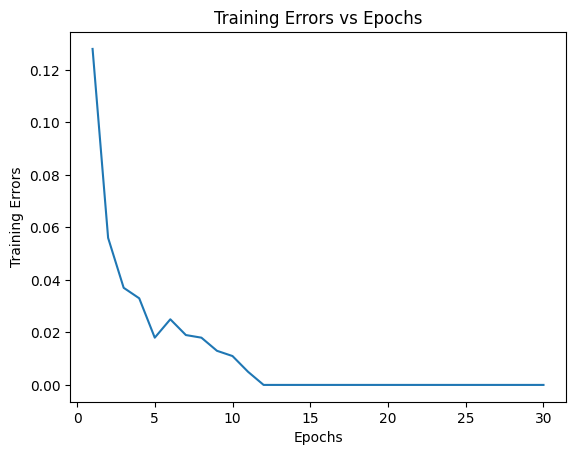

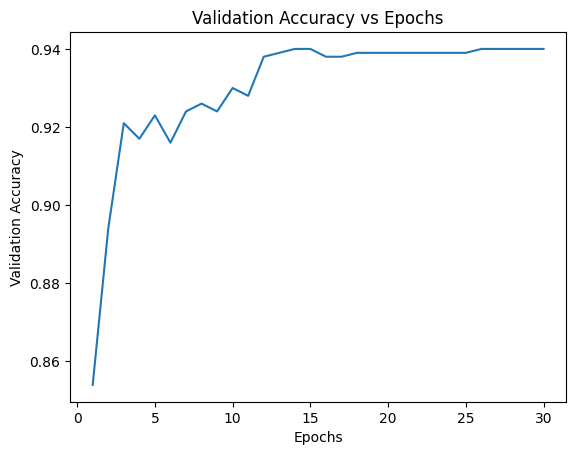

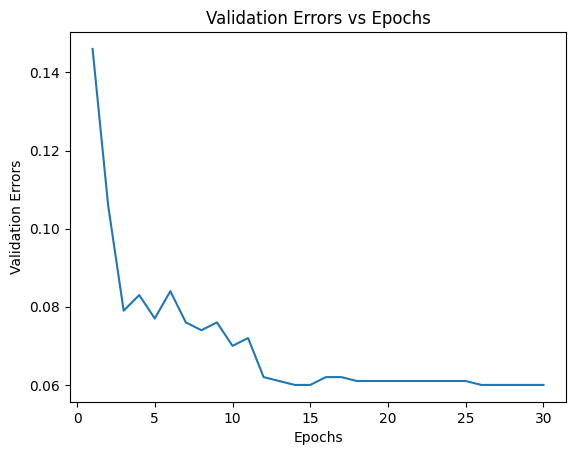

In [6]:
model = NN()
trainNN(model,30,learning_rate=0.01,momentum=0.9)
###
#model = NN()
#train(model,20,learning_rate=0.005,momentum=0.5)

#model = NN()
#train(model,10,learning_rate=0.01,momentum=0.9)
###

In [7]:
class NN_whichnumber(nn.Module):
  #set up all the layers inside of the innit to define their sizes
  def __init__(self):
    super(NN_whichnumber,self).__init__()
    self.layer1 = nn.Linear(28*28,50)
    self.layer2 = nn.Linear(50,20)
    self.layer3 = nn.Linear(20,10)

  #specifically impliment how the layers interact and are passed to each other
  def forward(self, img):
    #need to flatten the image first into a one dimensional tensor
    flattened = img.view(-1, 28*28)

    #passes the image into the first layer and relu = max(0,x) to apply non-linearity
    activation1 = self.layer1(flattened)
    activation1 = F.relu(activation1)

    #passes the first layer into the first second and relu = max(0,x) to apply non-linearity
    activation2 = self.layer2(activation1)
    activation2 = F.relu(activation2)

    #passes the second layer into the final layer
    #we don't use Relu here because we want to apply a soft max
    #to choose which probability is the highest
    #but we are using criterion = nn.CrossEntropyLoss() which
    #will apply it for us.!
    #always make sure to know which activation function is used when based on which loss function u use
    activation3 = self.layer3(activation2)

    return activation3



In [8]:
def trainNN_whichnumber(model, epochs, learning_rate, momentum):
  criterion = nn.CrossEntropyLoss() #loss function
  optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum) #optimizer settings

  train_errors = []
  train_accuracies = []
  val_errors = []
  val_accuracies = []
  print(f"Training with: Learning Rate = {learning_rate}, Momentum = {momentum}")


  for epoch in range(epochs):
    train_error = 0
    val_error =0
    for (train_batch, val_batch) in zip(mnist_train,mnist_val):
      (train_image, train_label) = train_batch
      (val_image, val_label) = val_batch
      train_out = model(img_to_tensor(train_image)) #gets output from the model
      train_prob = F.softmax(train_out, dim=1) #converts each output vector to a prob
      train_max_prob, train_prediction = torch.max(train_prob, dim=1) #gets the max probability and the predicted number

      if(train_prediction != train_label): #increments the error counter
        train_error+=1

      val_out = model(img_to_tensor(val_image))
      val_prob = F.softmax(val_out, dim=1)
      val_max_prob, val_prediction = torch.max(val_prob, dim=1)
      if(val_prediction != val_label): #increments the error counter
        val_error+=1


      loss = criterion(train_out,torch.tensor([train_label])) #calculates the loss
      loss.backward() #obtains the gradients based on the loss function
      optimizer.step() #updates the model parameters
      optimizer.zero_grad() #clean up step!

    #keeping track of errors and accuracy
    train_errors.append(train_error/len(mnist_train))
    val_errors.append(val_error/len(mnist_val))
    print(f"Training Error Rate: {train_errors[epoch]}, Validation Error Rate: {val_errors[epoch]}" )

    val_accuracies.append(1-val_error/len(mnist_val))
    train_accuracies.append(1-train_error/len(mnist_train))
    print(f"Training Accuracy: {train_accuracies[epoch]}, Validation Accuracy: {val_accuracies[epoch]}" )



  #plotting results
  plt.plot(np.arange(1,epochs+1,1) , train_accuracies)
  plt.title("Training Accuracy vs Epochs")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.show()

  plt.plot(np.arange(1,epochs+1,1) , train_errors)
  plt.title("Training Errors vs Epochs")
  plt.xlabel("Epochs")
  plt.ylabel("Errors")
  plt.show()

  plt.plot(np.arange(1,epochs+1,1) , val_accuracies)
  plt.title("Validation Accuracy vs Epochs")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.show()

  plt.plot(np.arange(1,epochs+1,1) , val_errors)
  plt.title("Validation Errors vs Epochs")
  plt.xlabel("Epochs")
  plt.ylabel("Errors")
  plt.show()



Training with: Learning Rate = 0.005, Momentum = 0.9
Training Error Rate: 0.434, Validation Error Rate: 0.453
Training Accuracy: 0.5660000000000001, Validation Accuracy: 0.5469999999999999
Training Error Rate: 0.253, Validation Error Rate: 0.268
Training Accuracy: 0.747, Validation Accuracy: 0.732
Training Error Rate: 0.167, Validation Error Rate: 0.236
Training Accuracy: 0.833, Validation Accuracy: 0.764
Training Error Rate: 0.121, Validation Error Rate: 0.209
Training Accuracy: 0.879, Validation Accuracy: 0.791
Training Error Rate: 0.105, Validation Error Rate: 0.218
Training Accuracy: 0.895, Validation Accuracy: 0.782
Training Error Rate: 0.097, Validation Error Rate: 0.186
Training Accuracy: 0.903, Validation Accuracy: 0.8140000000000001
Training Error Rate: 0.075, Validation Error Rate: 0.183
Training Accuracy: 0.925, Validation Accuracy: 0.817
Training Error Rate: 0.087, Validation Error Rate: 0.177
Training Accuracy: 0.913, Validation Accuracy: 0.823
Training Error Rate: 0.063, 

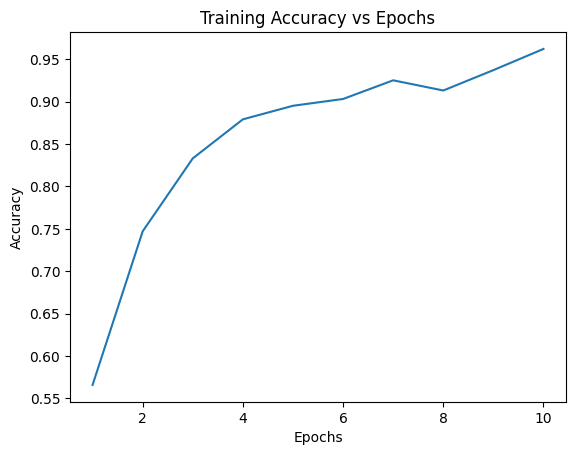

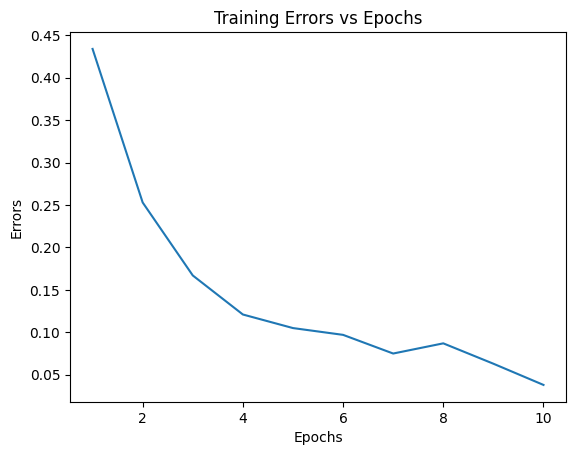

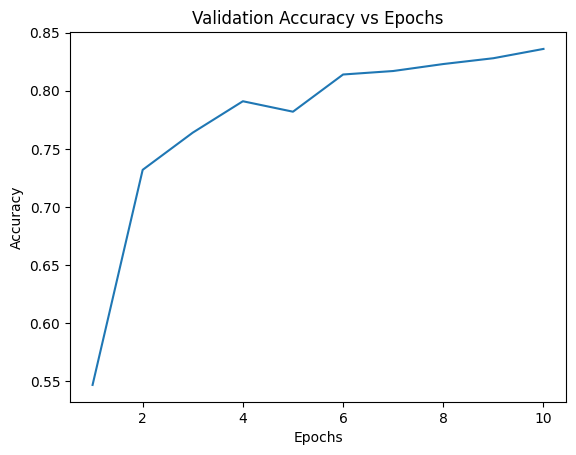

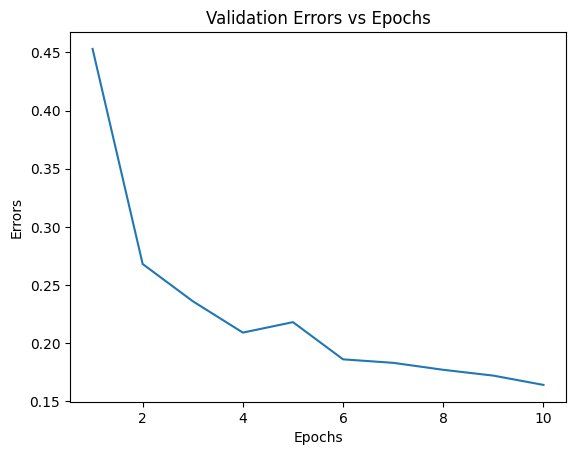

In [9]:
model1 = NN_whichnumber()
trainNN_whichnumber(model1,10,learning_rate=0.005,momentum=0.9)


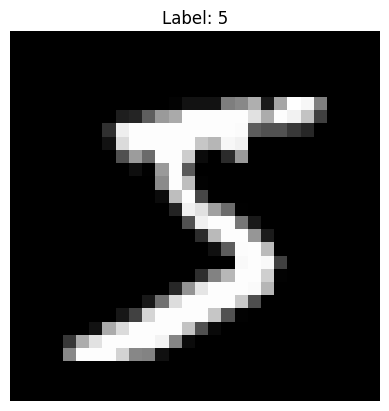

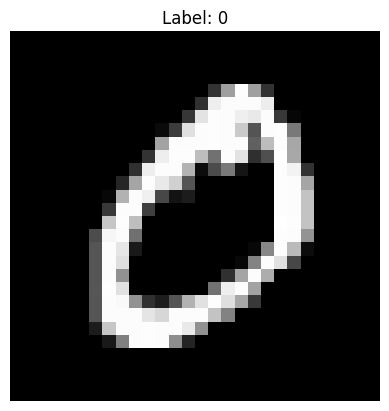

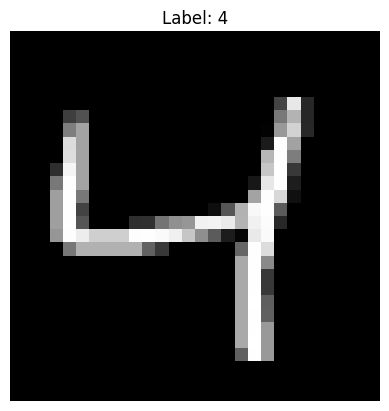

In [10]:
for (image, label) in mnist_train[:3]:
  plt.axis("off")
  plt.title(f"Label: {label}")
  plt.imshow(image,cmap="gray")
  plt.show()